[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
=====
***

This will be a milestone! We now get to Step 8: Burgers' equation. We can learn so much more from this equation. It plays a very important role in fluid mechanics, because it contains the full convective nonlinearity of the flow equations, and at the same time there are many known analytical solutions.


Step 8: Burgers' Equation in 2D
----
***

Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = $$
$$\qquad \nu \bigg( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \bigg)$$



$$
\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = $$
$$\nu \bigg( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \bigg)$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j+1}^n)$$ 

$$v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j+1}^n)$$ 

In [1]:
%matplotlib inline

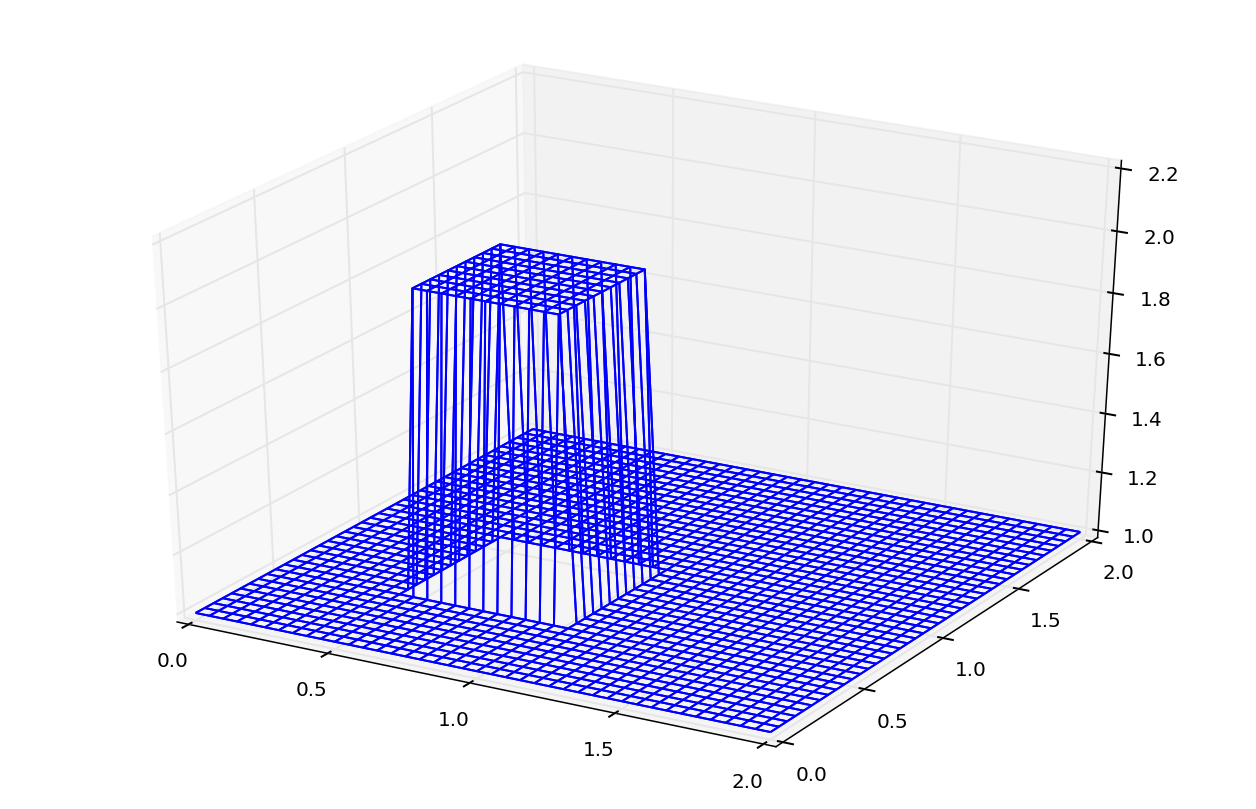

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

###variable declarations
nx = 41
ny = 41
nt = 120
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .0009
nu = 0.01
dt = sigma*dx*dy/nu


x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
v = np.ones((ny,nx))
un = np.ones((ny,nx)) ##
vn = np.ones((ny,nx))
comb = np.ones((ny,nx))

###Assign initial conditions

u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

###(plot ICs)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u[:], cmap=cm.coolwarm)
wire2 = ax.plot_wireframe(X,Y,v[:], cmap=cm.coolwarm)
#ax.set_xlim(1,2)
#ax.set_ylim(1,2)
#ax.set_zlim(1,5)
plt.show()

In [3]:
for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1,1:-1] = un[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])-dt/dy*vn[1:-1,1:-1]* \
                   (un[1:-1,1:-1]-un[1:-1,0:-2])+nu*dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+ \
                   nu*dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])
    
    v[1:-1,1:-1] = vn[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-dt/dy*vn[1:-1,1:-1]* \
                   (vn[1:-1,1:-1]-vn[1:-1,0:-2])+nu*dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+ \
                   nu*dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])
     
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1

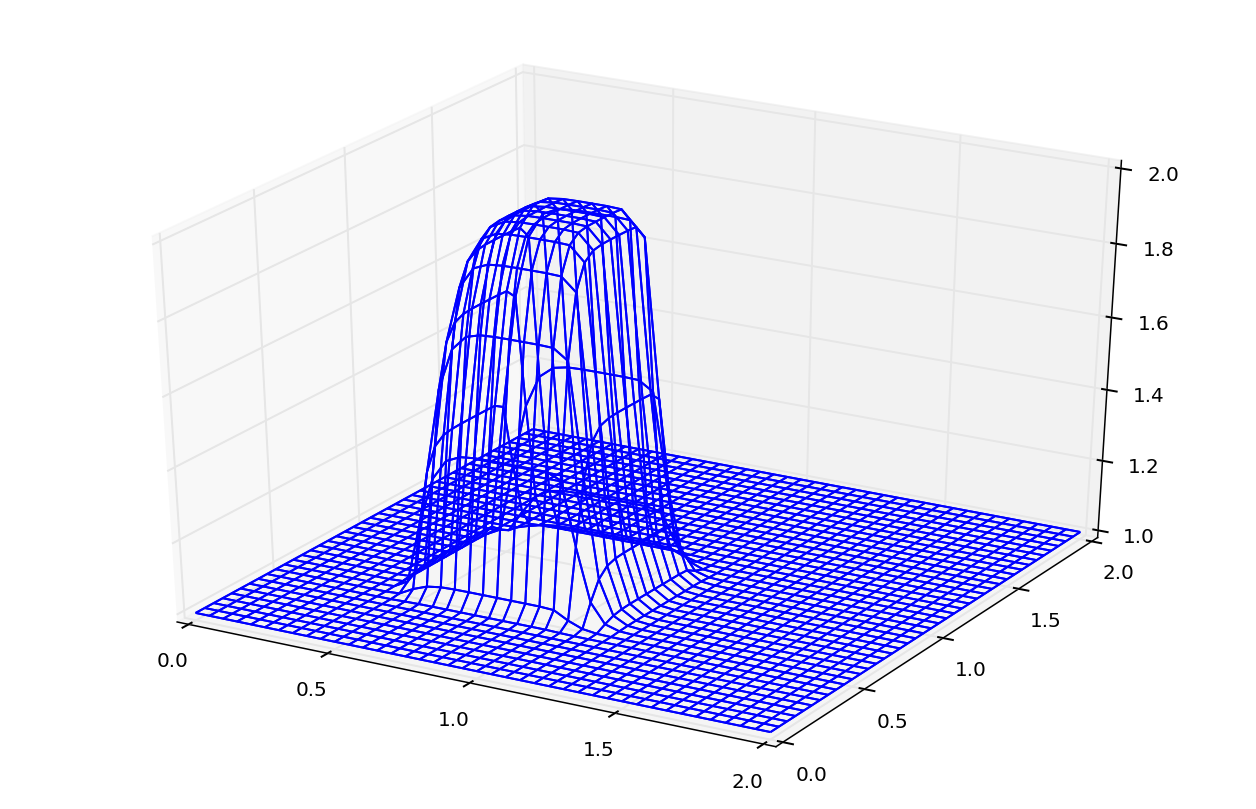

In [4]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u[:])
wire2 = ax.plot_wireframe(X,Y,v[:])
#ax.set_xlim(1,2)
#ax.set_ylim(1,2)
#ax.set_zlim(1,5)
plt.show()

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson 6** on You Tube:

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)